In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040566.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1        2         3         4         5         6  \
0  0.552941  0.552941  0.54902  0.545098  0.541176  0.537255  0.537255   

          7         8        9  ...      4192     4193      4194      4195  \
0  0.533333  0.529412  0.52549  ...  0.454902  0.45098  0.447059  0.443137   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.439216  0.435294  0.431373  0.427451    136.090909      65.727273  

[1 rows x 4202 columns]
[136.09090909]  /  [65.72727273]
          0         1        2         3         4         5         6  \
0  0.552941  0.552941  0.54902  0.545098  0.541176  0.537255  0.537255   

          7         8        9  ...      4190      4191      4192     4193  \
0  0.533333  0.529412  0.52549  ...  0.458824  0.458824  0.454902  0.45098   

       4194      4195      4196      4197      4198      4199  
0  0.447059  0.443137  0.439216  0.435294  0.431373  0.427451  

[1 rows x 4200 columns]


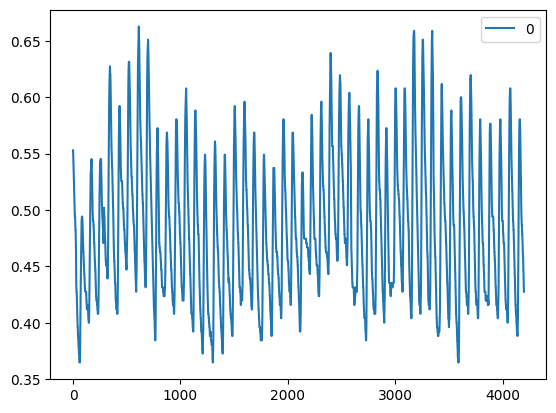

In [462]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [463]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

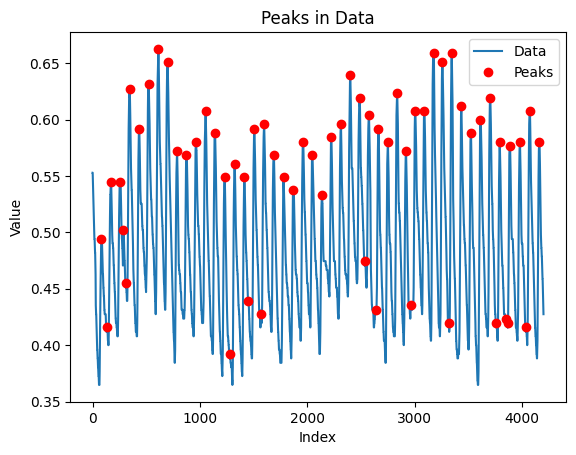

{'indices': array([  83,  136,  172,  257,  287,  311,  344,  433,  521,  613,  699,
        786,  874,  962, 1053, 1139, 1230, 1280, 1322, 1413, 1451, 1506,
       1566, 1597, 1687, 1778, 1870, 1960, 2046, 2136, 2222, 2312, 2399,
       2486, 2539, 2572, 2636, 2662, 2749, 2836, 2918, 2967, 3004, 3089,
       3175, 3257, 3316, 3344, 3433, 3522, 3612, 3703, 3761, 3791, 3850,
       3866, 3885, 3979, 4039, 4071, 4160]), 'values': array([0.49411765, 0.41568627, 0.54509804, 0.54509804, 0.50196078,
       0.45490196, 0.62745098, 0.59215686, 0.63137255, 0.6627451 ,
       0.65098039, 0.57254902, 0.56862745, 0.58039216, 0.60784314,
       0.58823529, 0.54901961, 0.39215686, 0.56078431, 0.54901961,
       0.43921569, 0.59215686, 0.42745098, 0.59607843, 0.56862745,
       0.54901961, 0.5372549 , 0.58039216, 0.56862745, 0.53333333,
       0.58431373, 0.59607843, 0.63921569, 0.61960784, 0.4745098 ,
       0.60392157, 0.43137255, 0.59215686, 0.58039216, 0.62352941,
       0.57254902, 0.43529412, 0

In [464]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [465]:
def split_values_high_low(filtered_df, threshold=0.52):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, None, 0.5450980392156862, 0.5450980392156862, None, None, 0.6274509803921569, 0.592156862745098, 0.6313725490196078, 0.6627450980392157, 0.6509803921568628, 0.5725490196078431, 0.5686274509803921, 0.5803921568627451, 0.6078431372549019, 0.5882352941176471, 0.5490196078431373, None, 0.5607843137254902, 0.5490196078431373, None, 0.592156862745098, None, 0.596078431372549, 0.5686274509803921, 0.5490196078431373, 0.5372549019607843, 0.5803921568627451, 0.5686274509803921, 0.5333333333333333, 0.5843137254901961, 0.596078431372549, 0.6392156862745098, 0.6196078431372549, None, 0.6039215686274509, None, 0.592156862745098, 0.5803921568627451, 0.6235294117647059, 0.5725490196078431, None, 0.6078431372549019, 0.6078431372549019, 0.6588235294117647, 0.6509803921568628, None, 0.6588235294117647, 0.611764705882353, 0.5882352941176471, 0.6, 0.6196078431372549, None, 0.5803921568627451, None, None, 0.5764705882352941, 0.5803921568627451, None, 0.6078431372549019, 0.5803921568627451]
[0.4941176

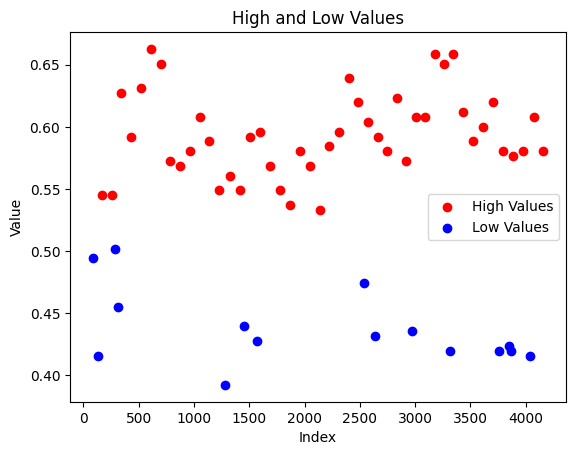

In [466]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [467]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.5934356351236149
Average Low Value: 0.4376470588235295
